In [2]:
cog_key = 'aaafdfa6aeb249cbbaa52a601eca7a6f'
cog_endpoint = 'https://license-plate-extraction.cognitiveservices.azure.com/'

print('Ready to use cognitive services at {} using key {}'.format(cog_endpoint, cog_key))

Ready to use cognitive services at https://license-plate-extraction.cognitiveservices.azure.com/ using key aaafdfa6aeb249cbbaa52a601eca7a6f


In [3]:
! pip install azure-cognitiveservices-vision-computervision 

To ARMY,
ARMY, who let BTS be BTS,
ARMY, who made it possible for us to
dream,
ARMY, looking at whom the first thing that
comes to my mind is the prettiest stars,
ARMY, who gave me the most beautiful
memories in my life,
ARMY, to whom I want to show and have
listen to only good and beautiful things,
ARMY, whom I miss/want to meet with **
ARMY, who let me feel that I am happy,
ARMY, whom I love the most,
Thank you.
From now on, we will make ARMY happy. I
love you. - BTS. JIMIN
** = multiple meanings




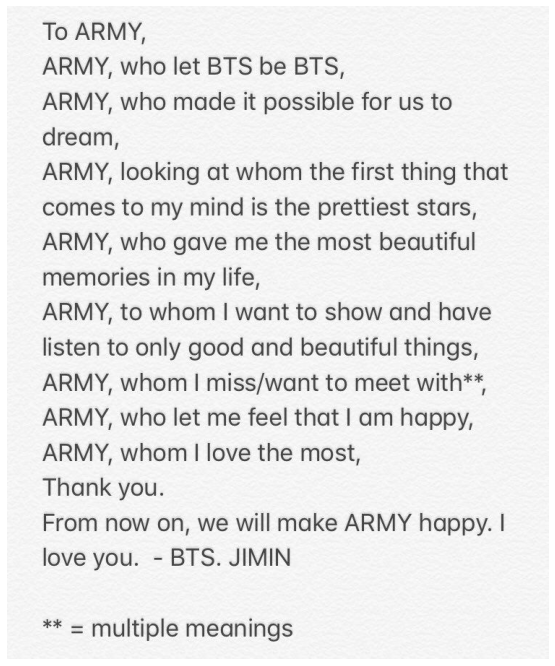

In [7]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from msrest.authentication import CognitiveServicesCredentials
import matplotlib.pyplot as plt
from PIL import Image
import time
import os
%matplotlib inline

# Read the image file
image_path = os.path.join('letter_.jpg')
image_stream = open(image_path, "rb")

# Get a client for the computer vision service
computervision_client = ComputerVisionClient(cog_endpoint, CognitiveServicesCredentials(cog_key))

# Submit a request to read printed text in the image and get the operation ID
read_operation = computervision_client.read_in_stream(image_stream, raw=True)
operation_location = read_operation.headers["Operation-Location"]
operation_id = operation_location.split("/")[-1]

# Wait for the asynchronous operation to complete
while True:
    read_results = computervision_client.get_read_result(operation_id)
    if read_results.status not in [OperationStatusCodes.running]:
        break
    time.sleep(1)

# If the operation was successfuly, process the text line by line
if read_results.status == OperationStatusCodes.succeeded:
    for result in read_results.analyze_result.read_results:
        for line in result.lines:
            print(line.text)

# Open image and display it.
print('\n')
fig = plt.figure(figsize=(12,12))
img = Image.open(image_path)
plt.axis('off')
plt.imshow(img)